# Analyse des données DVF - TD9 & TD10
Théo Midavaine - Jade Ly - Clémence Millet

In [1]:
import json
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
import warnings
import pandas as pd
import pygal

In [8]:
warnings.filterwarnings('ignore')

## Importation des données de l'année 2021 et 2018

In [9]:
full_table2021 = pd.read_table('valeursfoncieres-2021.txt',sep='|')
full_table2018 = pd.read_table('valeursfoncieres-2018.txt',sep='|')

## Nettoyage des données

On supprime les lignes répétées dans le dataframe

In [10]:
full_table2021.drop_duplicates(subset = None, keep = 'first', inplace=True)
full_table2018.drop_duplicates(subset = None, keep = 'first', inplace=True)

On supprime les colonnes avec plus de 50% des valeurs valant Nan

In [11]:
full_table2021.isnull().sum()/len(full_table2021)*100
full_table2018.isnull().sum()/len(full_table2018)*100

Code service CH               100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.828915
No voie                        43.187816
B/T/Q                          95.827051
Type de voie                   44.400214
Code voie                       0.943228
Voie                            0.943851
Code postal                     0.948331
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.607229
Section                         0.002645
No plan                         0.000000
No Volume                      99.689853
1er lot         

Les colonnes concernées sont : Code service CH, Reference document, 1 Articles CGI, 2 Articles CGI, 3 Articles CGI, 4 Articles CGI, 5 Articles CGI, B/T/Q, Prefixe de section, No Volume, 1er lot, Surface Carrez du 1er lot, 2eme lot, Surface Carrez du 2eme lot, 3eme lot, Surface Carrez du 3eme lot, 4eme lot, Surface Carrez du 4eme lot, 5eme lot, Surface Carrez du 5eme lot, Identifiant local et Nature culture speciale

In [12]:
clean_table2021 = full_table2021.drop(full_table2021.columns[[0,1,2,3,4,5,6,12,20,23,24,25,26,27,28,29,30,31,32,33,37,41]],axis=1)
clean_table2021

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,05/01/2021,Vente,"185000,00",5080.0,CHE,0471,DE VOGELAS,1370.0,VAL-REVERMONT,...,426,ZC,122,0,1.0,Maison,97.0,5.0,S,2410.0
1,1,05/01/2021,Vente,"185000,00",5080.0,CHE,0471,DE VOGELAS,1370.0,VAL-REVERMONT,...,426,ZC,122,0,3.0,Dépendance,0.0,0.0,S,2410.0
2,1,06/01/2021,Vente,"10,00",NaN,NaN,B043,ROUGEMONT,1290.0,BEY,...,42,A,204,0,NaN,NaN,NaN,NaN,BT,530.0
3,1,04/01/2021,Vente,"204332,00",7.0,ALL,0276,DES ECUREUILS,1310.0,BUELLAS,...,65,B,1325,0,1.0,Maison,88.0,4.0,S,866.0
4,1,06/01/2021,Vente,"320000,00",87.0,RTE,0140,DE CERTINES,1250.0,MONTAGNAT,...,254,AZ,11,0,1.0,Maison,168.0,5.0,S,1426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379227,1,12/03/2021,Vente,"383000,00",8.0,RUE,9382,DES TOURNELLES,75004.0,PARIS 04,...,104,AO,117,2,2.0,Appartement,30.0,2.0,NaN,NaN
3379228,1,17/03/2021,Vente,"260000,00",8.0,RUE,8561,SAINTE FOY,75002.0,PARIS 02,...,102,AP,128,2,2.0,Appartement,37.0,2.0,NaN,NaN
3379229,1,19/03/2021,Vente,"38000,00",6.0,RUE,4398,DES GUILLEMITES,75004.0,PARIS 04,...,104,AH,68,1,3.0,Dépendance,0.0,0.0,NaN,NaN
3379230,1,30/03/2021,Vente,"38000,00",30.0,RUE,7338,DU PETIT MUSC,75004.0,PARIS 04,...,104,AP,5,1,3.0,Dépendance,0.0,0.0,NaN,NaN


In [13]:
clean_table2018 = full_table2018.drop(full_table2018.columns[[0,1,2,3,4,5,6,12,20,23,24,25,26,27,28,29,30,31,32,33,37,41]],axis=1)
clean_table2018

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,03/01/2018,Vente,"109000,00",13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,...,53,AN,73,1,3.0,Dépendance,0.0,0.0,NaN,NaN
1,1,03/01/2018,Vente,"109000,00",13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,...,53,AN,73,2,2.0,Appartement,73.0,4.0,NaN,NaN
2,1,04/01/2018,Vente,"239300,00",4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,...,95,AH,186,0,1.0,Maison,51.0,2.0,AG,420.0
3,1,04/01/2018,Vente,"239300,00",4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,...,95,AH,186,0,1.0,Maison,163.0,4.0,S,949.0
4,1,04/01/2018,Vente,"239300,00",4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,...,95,AH,186,0,1.0,Maison,51.0,2.0,S,949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334142,1,28/12/2018,Vente,"1192307,00",1.0,PAS,2012,CHOISEUL,75002.0,PARIS 02,...,102,AD,118,2,2.0,Appartement,150.0,4.0,NaN,NaN
3334143,1,03/12/2018,Vente,"383000,00",12.0,RUE,7561,POISSONNIERE,75002.0,PARIS 02,...,102,AO,85,1,2.0,Appartement,34.0,1.0,NaN,NaN
3334144,1,28/12/2018,Vente,"746000,00",18.0,RUE,8548,STE CROIX BRETONNERIE,75004.0,PARIS 04,...,104,AH,53,1,4.0,Local industriel. commercial ou assimilé,60.0,0.0,NaN,NaN
3334145,1,13/12/2018,Adjudication,"645000,00",9.0,BD,6559,MORLAND,75004.0,PARIS 04,...,104,AS,74,2,2.0,Appartement,54.0,2.0,NaN,NaN


On observe que Valeur foncière a pour type object. On la transforme en float pour pouvoir la manipuler.

In [14]:
clean_table2018['Valeur fonciere'] = [str(x).replace(',','.') for x in clean_table2018['Valeur fonciere']]
clean_table2018['Valeur fonciere'] = clean_table2018['Valeur fonciere'].astype(float) 
clean_table2021['Valeur fonciere'] = [str(x).replace(',','.') for x in clean_table2021['Valeur fonciere']]
clean_table2021['Valeur fonciere'] = clean_table2021['Valeur fonciere'].astype(float) 

## Type de local
On cherche à observer la répartition des types de locaux dans le dataframe

In [15]:
clean_table2018['Type local'].value_counts(dropna = False,normalize=True).head()

NaN                                         0.463825
Maison                                      0.199607
Appartement                                 0.167984
Dépendance                                  0.128880
Local industriel. commercial ou assimilé    0.039704
Name: Type local, dtype: float64

In [16]:
clean_table2021['Type local'].value_counts(dropna = False,normalize=True).head()

NaN                                         0.432290
Dépendance                                  0.197760
Maison                                      0.197483
Appartement                                 0.139851
Local industriel. commercial ou assimilé    0.032616
Name: Type local, dtype: float64

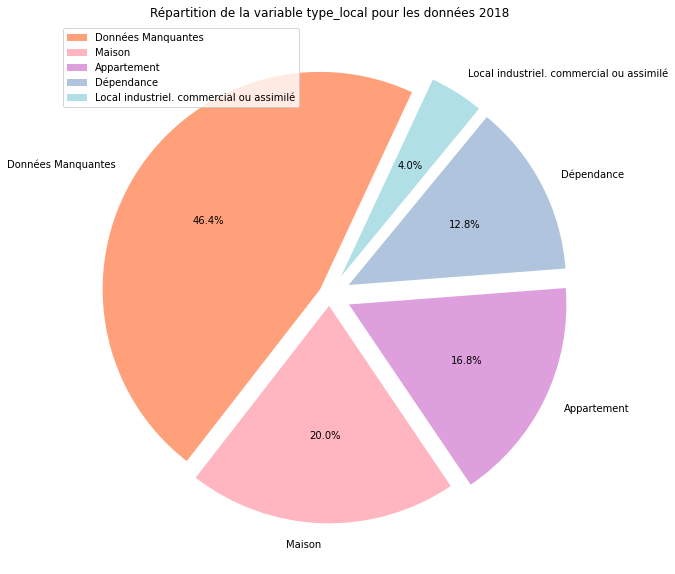

In [17]:
plt.figure(figsize=(10,10))
labels = ['Données Manquantes', 'Maison', 'Appartement', 'Dépendance', 'Local industriel. commercial ou assimilé']
colors = ['lightsalmon','lightpink','plum','lightsteelblue','powderblue']
area = [46.3, 19.9, 16.7, 12.8, 4]
#area = [91.93, 6.88, 0.82, 0.28,0.056]
explode = (0.05,0.05,0.1,0.1,0.1)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%')
plt.title(label= 'Répartition de la variable type_local pour les données 2018')
plt.legend()
plt.show()

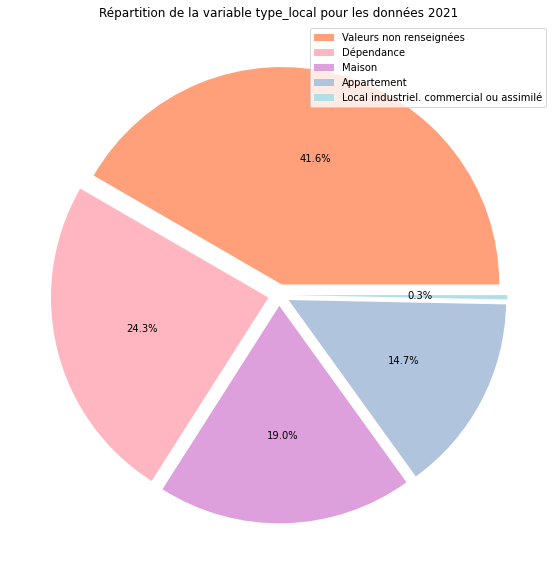

In [18]:
plt.figure(figsize=(10,10))
colors = ['lightsalmon','lightpink','plum','lightsteelblue','powderblue']
labels = ['Valeurs non renseignées',
          "Dépendance", 
          'Maison',  
          'Appartement',  
          'Local industriel. commercial ou assimilé']
area = [40.4,23.6,18.4,14.3,0.31]
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(area, explode=explode, autopct='%1.1f%%', colors=colors)
plt.title(label='Répartition de la variable type_local pour les données 2021')
plt.legend(labels=labels)
plt.show()

On observe que quasiment la moitié des données foncières n'ont pas de type renseigné. En dehors de ces données Nan, on a principalement des dépendances et maisons, puis des appartements. Les locaux industriels, commerciaux ou assimilés ne représentent qu'une partie infime des données.

## Ensuite, on supprime les lignes de données ne concernant pas une vente de bien
Cela est possible car le pourcentage que représente les ventes est supérieur à 90% donc cela ne changera rien au à l'étude que l'on va faire par la suite.
Ci-dessous on observe que les données supprimées sont celles concernant les ventes en l'état futur d'achèvement, les échanges, les ventes de terrain à batir et les adjudications.

In [19]:
clean_table2021['Nature mutation'].value_counts(dropna = False,normalize=True).head()

Vente                                 0.923665
Vente en l'état futur d'achèvement    0.061388
Echange                               0.009424
Vente terrain à bâtir                 0.002946
Adjudication                          0.001730
Name: Nature mutation, dtype: float64

In [20]:
clean_table2018['Nature mutation'].value_counts(dropna = False,normalize=True).head()

Vente                                 0.897520
Vente en l'état futur d'achèvement    0.079375
Echange                               0.014165
Vente terrain à bâtir                 0.004181
Adjudication                          0.003984
Name: Nature mutation, dtype: float64

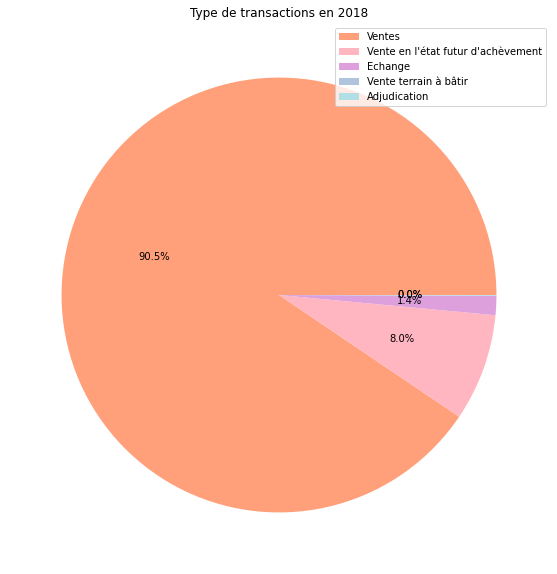

In [21]:
plt.figure(figsize=(10,10))

labels = ['Ventes',
          "Vente en l'état futur d'achèvement", 
          'Echange',  
          'Vente terrain à bâtir',  
          'Adjudication']
area = [89.7,7.9,1.4,0.04,0.03]
plt.pie(area,autopct = '%1.1f%%', colors=colors)
plt.title(label='Type de transactions en 2018')
plt.legend(labels=labels)
plt.show()

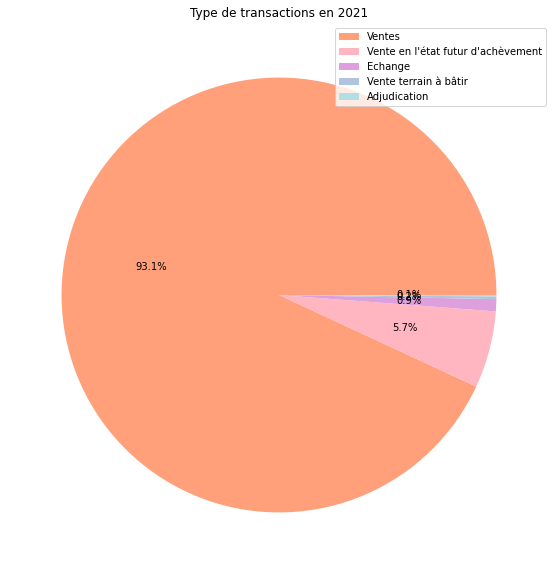

In [22]:
plt.figure(figsize=(10,10))
colors = ['lightsalmon','lightpink','plum','lightsteelblue','powderblue']
labels = ['Ventes',
          "Vente en l'état futur d'achèvement", 
          'Echange',  
          'Vente terrain à bâtir',  
          'Adjudication']
area = [92.8,5.7,0.9,0.2,0.1]
plt.pie(area, autopct = '%1.1f%%', colors=colors)
plt.title(label='Type de transactions en 2021')
plt.legend(labels=labels)
plt.show()

In [23]:
vente_table2018 = clean_table2018[(clean_table2018['Nature mutation']) == 'Vente']
vente_table2018.fillna(0)
vente_table2018

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,...,53,AN,73,1,3.0,Dépendance,0.0,0.0,NaN,NaN
1,1,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,...,53,AN,73,2,2.0,Appartement,73.0,4.0,NaN,NaN
2,1,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,...,95,AH,186,0,1.0,Maison,51.0,2.0,AG,420.0
3,1,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,...,95,AH,186,0,1.0,Maison,163.0,4.0,S,949.0
4,1,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,...,95,AH,186,0,1.0,Maison,51.0,2.0,S,949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334141,1,26/12/2018,Vente,220000.0,14.0,RUE,5702,DES LIONS SAINT PAUL,75004.0,PARIS 04,...,104,AQ,127,2,2.0,Appartement,29.0,1.0,NaN,NaN
3334142,1,28/12/2018,Vente,1192307.0,1.0,PAS,2012,CHOISEUL,75002.0,PARIS 02,...,102,AD,118,2,2.0,Appartement,150.0,4.0,NaN,NaN
3334143,1,03/12/2018,Vente,383000.0,12.0,RUE,7561,POISSONNIERE,75002.0,PARIS 02,...,102,AO,85,1,2.0,Appartement,34.0,1.0,NaN,NaN
3334144,1,28/12/2018,Vente,746000.0,18.0,RUE,8548,STE CROIX BRETONNERIE,75004.0,PARIS 04,...,104,AH,53,1,4.0,Local industriel. commercial ou assimilé,60.0,0.0,NaN,NaN


In [24]:
vente_table2021 = clean_table2021[(clean_table2021['Nature mutation']) == 'Vente']
vente_table2021.fillna(0)
vente_table2021

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,05/01/2021,Vente,185000.0,5080.0,CHE,0471,DE VOGELAS,1370.0,VAL-REVERMONT,...,426,ZC,122,0,1.0,Maison,97.0,5.0,S,2410.0
1,1,05/01/2021,Vente,185000.0,5080.0,CHE,0471,DE VOGELAS,1370.0,VAL-REVERMONT,...,426,ZC,122,0,3.0,Dépendance,0.0,0.0,S,2410.0
2,1,06/01/2021,Vente,10.0,NaN,NaN,B043,ROUGEMONT,1290.0,BEY,...,42,A,204,0,NaN,NaN,NaN,NaN,BT,530.0
3,1,04/01/2021,Vente,204332.0,7.0,ALL,0276,DES ECUREUILS,1310.0,BUELLAS,...,65,B,1325,0,1.0,Maison,88.0,4.0,S,866.0
4,1,06/01/2021,Vente,320000.0,87.0,RTE,0140,DE CERTINES,1250.0,MONTAGNAT,...,254,AZ,11,0,1.0,Maison,168.0,5.0,S,1426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379227,1,12/03/2021,Vente,383000.0,8.0,RUE,9382,DES TOURNELLES,75004.0,PARIS 04,...,104,AO,117,2,2.0,Appartement,30.0,2.0,NaN,NaN
3379228,1,17/03/2021,Vente,260000.0,8.0,RUE,8561,SAINTE FOY,75002.0,PARIS 02,...,102,AP,128,2,2.0,Appartement,37.0,2.0,NaN,NaN
3379229,1,19/03/2021,Vente,38000.0,6.0,RUE,4398,DES GUILLEMITES,75004.0,PARIS 04,...,104,AH,68,1,3.0,Dépendance,0.0,0.0,NaN,NaN
3379230,1,30/03/2021,Vente,38000.0,30.0,RUE,7338,DU PETIT MUSC,75004.0,PARIS 04,...,104,AP,5,1,3.0,Dépendance,0.0,0.0,NaN,NaN


In [25]:
vente_table2021.to_csv('Ventes_table2021.csv')

## Après avoir nettoyé le dataset, on peut procéder à l'analyse

In [26]:
vente_table2018.info()
vente_table2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2884595 entries, 0 to 3334146
Data columns (total 21 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   No disposition             int64  
 1   Date mutation              object 
 2   Nature mutation            object 
 3   Valeur fonciere            float64
 4   No voie                    float64
 5   Type de voie               object 
 6   Code voie                  object 
 7   Voie                       object 
 8   Code postal                float64
 9   Commune                    object 
 10  Code departement           object 
 11  Code commune               int64  
 12  Section                    object 
 13  No plan                    int64  
 14  Nombre de lots             int64  
 15  Code type local            float64
 16  Type local                 object 
 17  Surface reelle bati        float64
 18  Nombre pieces principales  float64
 19  Nature culture             object 
 20  Su

## Ventes par région

Maintenant qu'on a gardé uniquement les ventes, on décide de regarder le nombre de ventes par région. Pour cela, on doit définir les régions.

In [27]:
REGIONS = {
    'Auvergne-Rhône-Alpes': ['1', '3', '7', '15', '26', '38', '42', '43', '63', '69', '73', '74'],
    'Bourgogne-Franche-Comté': ['21', '25', '39', '58', '70', '71', '89', '90'],
    'Bretagne': ['35', '22', '56', '29'],
    'Centre-Val de Loire': ['18', '28', '36', '37', '41', '45'],
    'Corse': ['2A', '2B'],
    'Grand Est': ['8', '10', '51', '52', '54', '55', '57', '67', '68', '88'],
    'Guadeloupe': ['971'],
    'Guyane': ['973'],
    'Hauts-de-France': ['2', '59', '60', '62', '80'],
    'Île-de-France': ['75', '77', '78', '91', '92', '93', '94', '95'],
    'La Réunion': ['974'],
    'Martinique': ['972'],
    'Normandie': ['14', '27', '50', '61', '76'],
    'Nouvelle-Aquitaine': ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
    'Occitanie': ['9', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
    'Pays de la Loire': ['44', '49', '53', '72', '85'],
    'Provence-Alpes-Côte d\'Azur': ['4', '5', '6', '13', '83', '84'],
}
def find_region(v,dico): 
    for k, val in dico.items(): 
        if str(v) in val: 
            return k 
    return v

vente_reg2018 = pd.DataFrame()
vente_table2018['Nature mutation'].value_counts(dropna = False,normalize=True).head()
vente_reg2018['Nombre de ventes'] = vente_table2018.groupby('Code departement')['Nature mutation'].count().sort_values(ascending= True)


vente_reg2018['Region'] = ''
count = 0
for i in vente_reg2018['Nombre de ventes']:
    vente_reg2018['Region'][count] = find_region(vente_reg2018.index[vente_reg2018['Nombre de ventes'] == i].tolist()[0],REGIONS)
    count+=1

vente_reg2018.groupby('Region')['Nombre de ventes'].sum().sort_values(ascending= False)

Region
Nouvelle-Aquitaine            447977
Occitanie                     356629
Auvergne-Rhône-Alpes          295925
Bourgogne-Franche-Comté       212593
Bretagne                      200730
Hauts-de-France               193661
Grand Est                     193159
Île-de-France                 168165
Centre-Val de Loire           166576
Provence-Alpes-Côte d'Azur    162744
Normandie                     158301
Pays de la Loire              144770
Corse                          70824
                               51477
La Réunion                     30312
Martinique                     19114
Guadeloupe                      9460
Guyane                          2178
Name: Nombre de ventes, dtype: int64

### On créé un dictionnaire Regions permettant d'associer les départements à une région pour ensuite construire des graphiques dont les données peuvent être triées / classées par région et non pas par département

In [28]:
REGIONS = {
    'Auvergne-Rhône-Alpes': ['1', '3', '7', '15', '26', '38', '42', '43', '63', '69', '73', '74'],
    'Bourgogne-Franche-Comté': ['21', '25', '39', '58', '70', '71', '89', '90'],
    'Bretagne': ['35', '22', '56', '29'],
    'Centre-Val de Loire': ['18', '28', '36', '37', '41', '45'],
    'Corse': ['2A', '2B'],
    'Grand Est': ['8', '10', '51', '52', '54', '55', '57', '67', '68', '88'],
    'Guadeloupe': ['971'],
    'Guyane': ['973'],
    'Hauts-de-France': ['2', '59', '60', '62', '80'],
    'Île-de-France': ['75', '77', '78', '91', '92', '93', '94', '95'],
    'La Réunion': ['974'],
    'Martinique': ['972'],
    'Normandie': ['14', '27', '50', '61', '76'],
    'Nouvelle-Aquitaine': ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
    'Occitanie': ['9', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
    'Pays de la Loire': ['44', '49', '53', '72', '85'],
    'Provence-Alpes-Côte d\'Azur': ['4', '5', '6', '13', '83', '84'],
}
def find_region(v,dico): 
    for k, val in dico.items(): 
        if str(v) in val: 
            return k 
    return v

vente_reg2021 = pd.DataFrame()
vente_table2021['Nature mutation'].value_counts(dropna = False,normalize=True).head()
vente_reg2021['Nombre de ventes'] = vente_table2021.groupby('Code departement')['Nature mutation'].count().sort_values(ascending= True)


vente_reg2021['Region'] = ''
count = 0
for i in vente_reg2021['Nombre de ventes']:
    vente_reg2021['Region'][count] = find_region(vente_reg2021.index[vente_reg2021['Nombre de ventes'] == i].tolist()[0],REGIONS)
    count+=1

vente_reg2021.groupby('Region')['Nombre de ventes'].sum().sort_values(ascending= False)

Region
Nouvelle-Aquitaine            357713
Occitanie                     354952
Auvergne-Rhône-Alpes          352631
Île-de-France                 290590
Bourgogne-Franche-Comté       231304
Hauts-de-France               204803
Pays de la Loire              181644
Grand Est                     170033
Bretagne                      154679
Provence-Alpes-Côte d'Azur    148350
Normandie                     120522
Centre-Val de Loire           117648
Martinique                     70637
Corse                          34425
Guadeloupe                     32371
                               31578
La Réunion                     24271
Guyane                         19429
Name: Nombre de ventes, dtype: int64

## Répartition des ventes par région

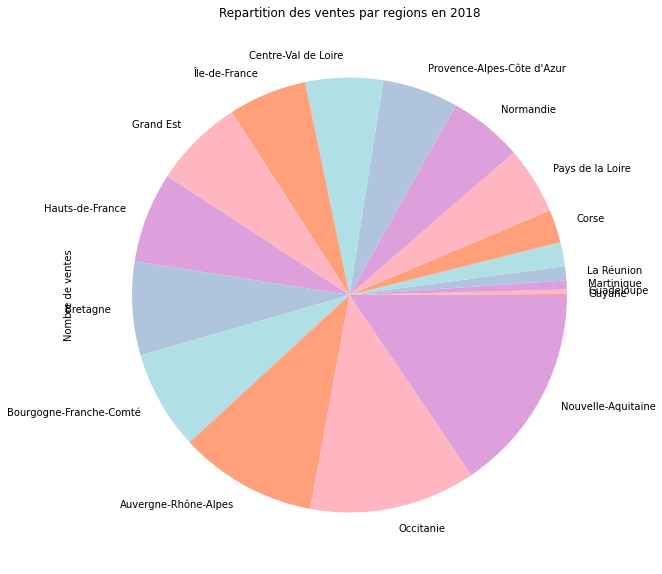

In [29]:
plt.figure(figsize=(20,10))
plt.title(label='Repartition des ventes par regions en 2018')

axis = vente_reg2018.groupby('Region')['Nombre de ventes'].sum().sort_values(ascending= True).plot.pie(rot=0, colors=colors)
plt.show()

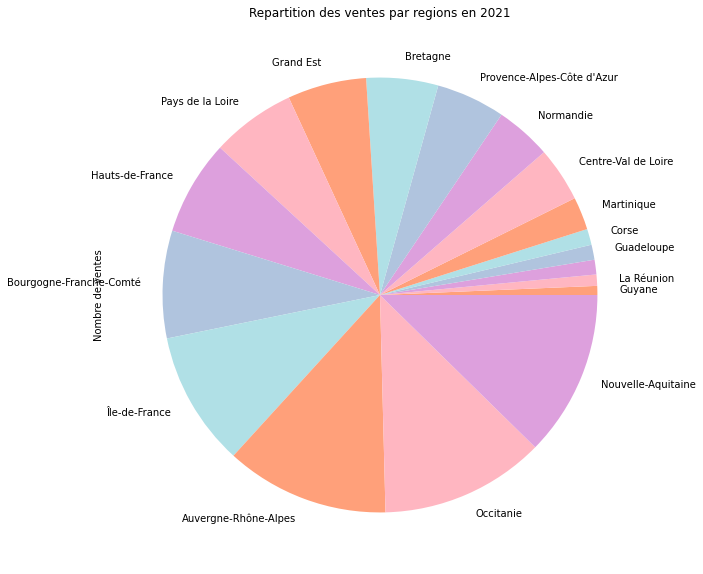

In [30]:
plt.figure(figsize=(20,10))
plt.title(label='Repartition des ventes par regions en 2021')

axis = vente_reg2021.groupby('Region')['Nombre de ventes'].sum().sort_values(ascending= True).plot.pie(rot=0, colors=colors)
plt.show()

On remarque que les régions Nouvelle-Aquitaine et Occitanie représentent le plus de ventes, et que les régions d'Outre-mer représentent les plus petites part des ventes. A part pour ces régions, 9 régions sont représentées à part plutôt similaires en terme de ventes. Et 3 régions représentent ensemble environ 1/3 du marché que ce soit en 2018 ou 2021. On remarque qu'en général les données entre 2018 et 2021 différent peu mais qu'en 2021 le nombre de ventes en Ile-de-France a beaucoup augmenté.

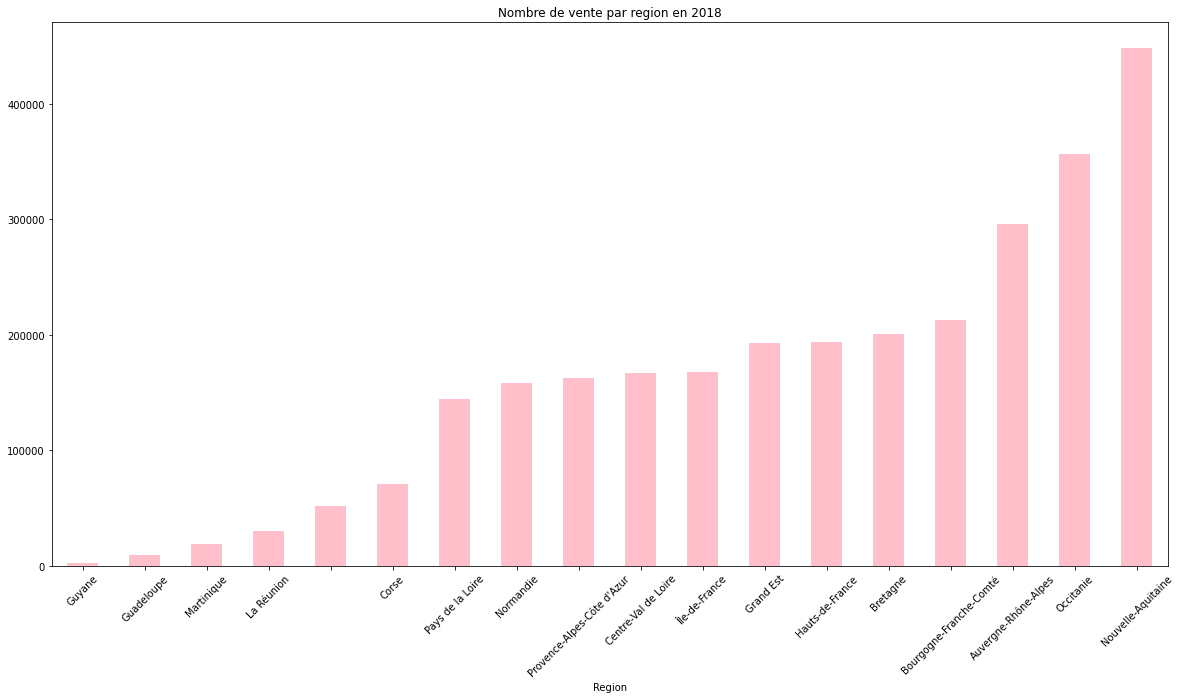

In [31]:
plt.figure(figsize=(20,10))
plt.title(label='Nombre de vente par region en 2018')
axis = vente_reg2018.groupby('Region')['Nombre de ventes'].sum().sort_values(ascending= True).plot.bar(rot=0, color='pink')
plt.xticks(rotation=45)
plt.show()

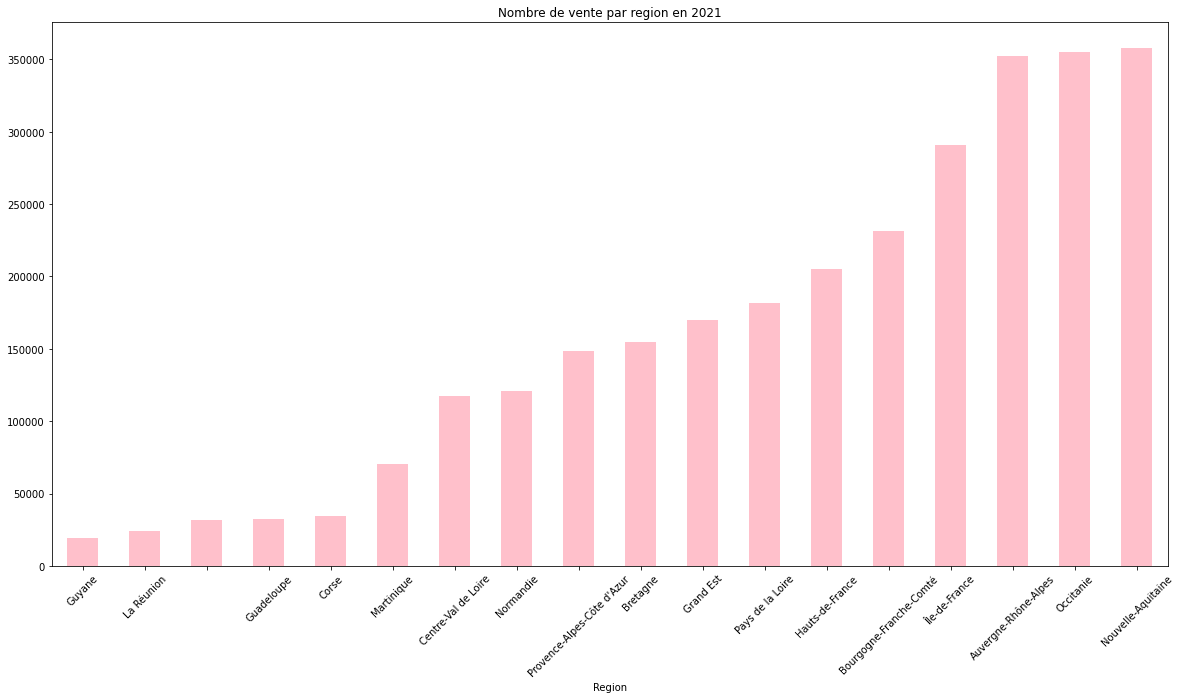

In [32]:
plt.figure(figsize=(20,10))
plt.title(label='Nombre de vente par region en 2021')
axis = vente_reg2021.groupby('Region')['Nombre de ventes'].sum().sort_values(ascending= True).plot.bar(rot=0,color='pink')
plt.xticks(rotation=45)
plt.show()

Ce graphique confirme notre analyse précédente en nous permettant de voir de manière plus détaillée les ventes par région ainsi que les différences de ventes entre région. Cependant les 3 premières régions ont un nombre de ventes à peu près égal alors qu'en 2018 on voit une rééelle gradation entre les régions. On voit aussi mieux que la région Ile-de-France est passée de la 8e à la 4e position. Il est à noter aussi que le nombre de ventes est influé par le nombre d'habitants dans la région ainsi que sa superficie : les 3 régions Nouvelles-Aquitaine, Occitanie et Auvergne-Rhône-Alpes sont les plus étendues. A l'inverse, les territoires d'Outre-Mers sont bine plus petits et ont moins d'habitants.

## Nombre de ventes par département

On observe les ventes par département de manière successive selon le type de local pour voir leur impact.

In [33]:
vente_table2018.groupby('Code departement')['Nature mutation'].count().sort_values(ascending = False)

Code departement
33     85730
59     76443
44     70232
69     67296
13     61615
       ...  
971     5212
972     4782
90      4526
30      3959
973     2178
Name: Nature mutation, Length: 99, dtype: int64

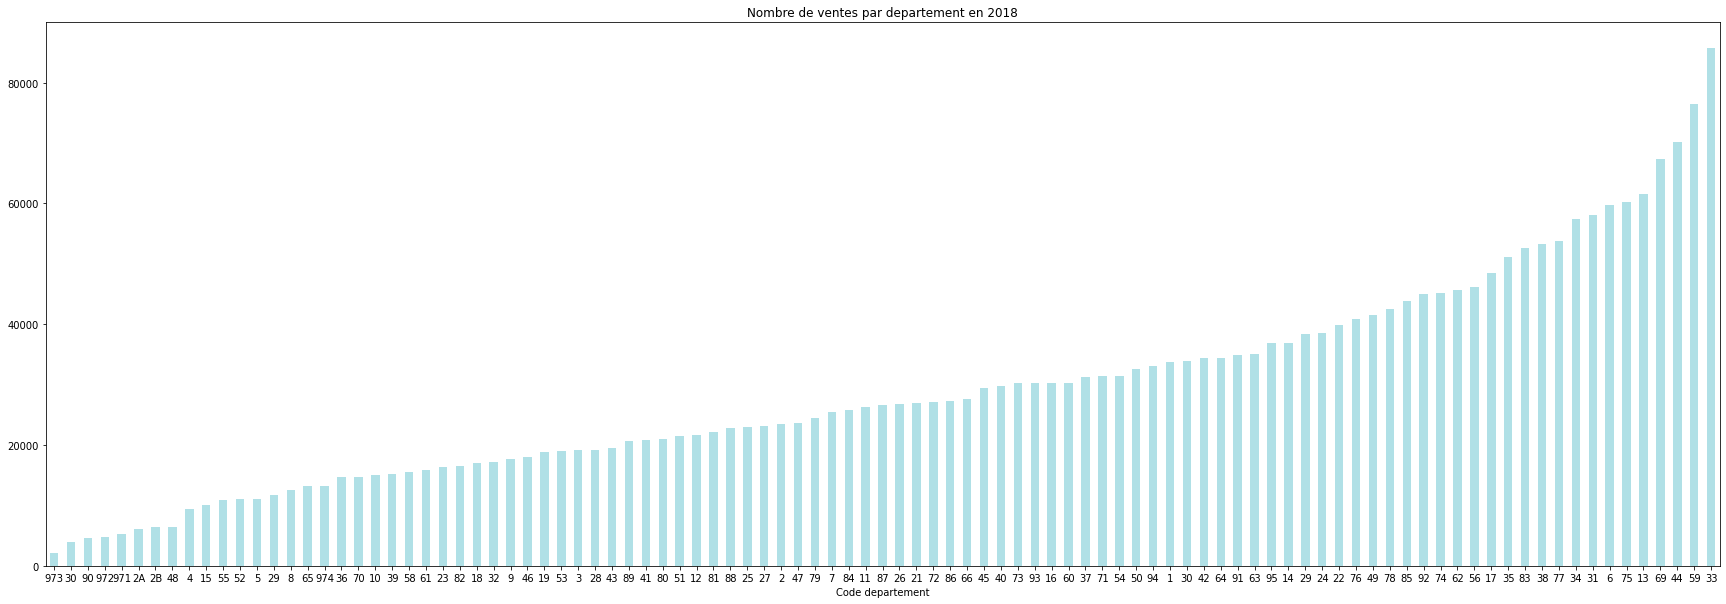

In [34]:
plt.figure(figsize=(30,10))
axis = vente_table2018.groupby('Code departement')['Nature mutation'].count().sort_values(ascending = True).plot.bar(rot=0, color='powderblue')
plt.title(label='Nombre de ventes par departement en 2018')
plt.show()

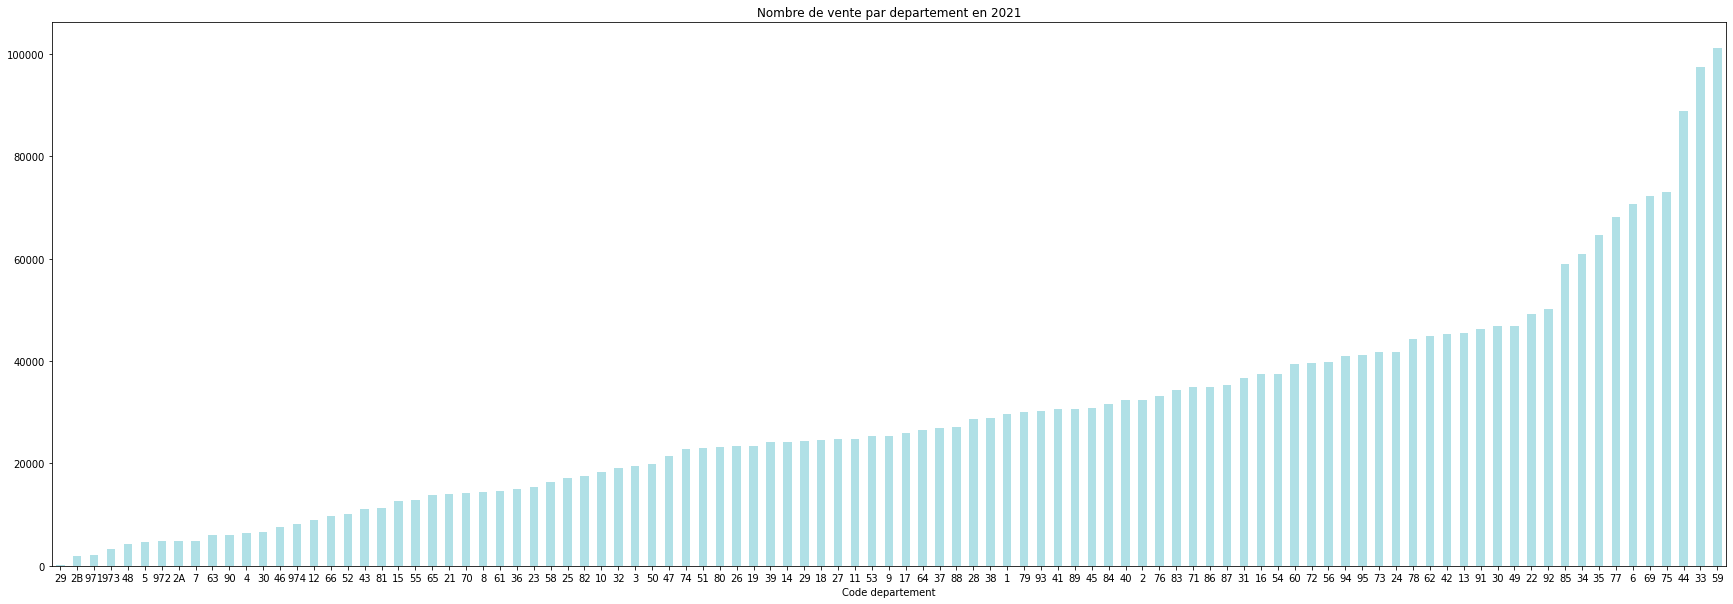

In [35]:
plt.figure(figsize=(30,10))
axis = vente_table2021.groupby('Code departement')['Nature mutation'].count().sort_values(ascending = True).plot.bar(rot=0, color = 'powderblue')
plt.title(label='Nombre de vente par departement en 2021')
plt.show()

On remarque qu'en 2018 les departements 33, 59 et 44 recensent le plus de ventes, avec au moins 70000 ventes chacun. En 2021, on observe que les mêmes départements sont en tête avec un ordre légèrement différent et toujours autant de ventes.
En revanche, contrairement à ce qu'on a vu lors que la répartition des ventes pas régions. Le nombre de ventes dans les départements d'Ile-de-France a baissé globalement.


### On observe maintenant seulement les ventes de maison par départements

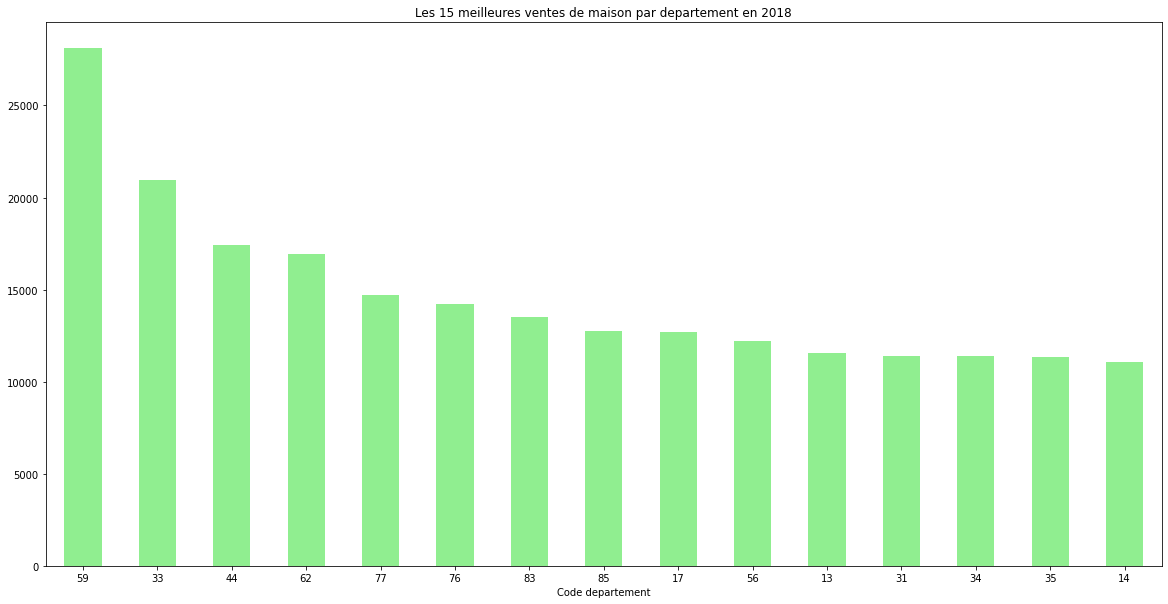

In [36]:
plt.figure(figsize=(20,10))
axis = vente_table2018[vente_table2018['Type local'] == 'Maison'].groupby('Code departement')['Nature mutation'].count().sort_values(ascending = True).nlargest(15).plot.bar(rot=0, color='lightgreen')
plt.title(label='Les 15 meilleures ventes de maison par departement en 2018')
plt.show()

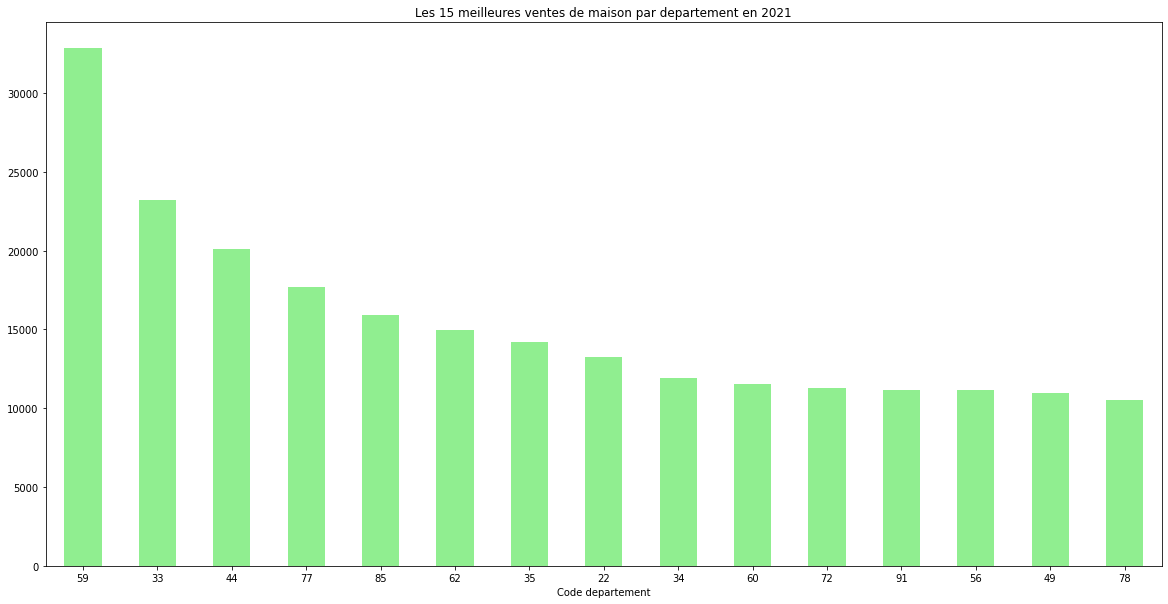

In [37]:
plt.figure(figsize=(20,10))
axis = vente_table2021[vente_table2021['Type local'] == 'Maison'].groupby('Code departement')['Nature mutation'].count().sort_values(ascending = True).nlargest(15).plot.bar(rot=0, color='lightgreen')
plt.title(label='Les 15 meilleures ventes de maison par departement en 2021')
plt.show()

#Nb vente de maison / departement les 15 meilleurs départements

En 2018, sur les 15 départements vendant le plus de maisons, le département 59 se démarque particulièrement. On retrouve le même top 4 de départements vendant le plus de maisons que pour le graphique précédent qui ne distinguait pas le type de local : les départements 59, 33 et 44 font le plus de ventes de maison. Cependant, le 4e département faisant le plus de vente indépendamment du type de local, le 69, n'est pas du tout présent dans le top 15 des départements vendant le plus de maisons.
En 2021, les ventes de maisons ont augmenté et certains départements sont sortis du top 15 tels que le 76, le 83 ou le 13. A part pour les 5 premiers départements, les départements présents dans le graphique sont assez différents.

### On observe maintenant seulement les 15 meilleures ventes d'appartements par département

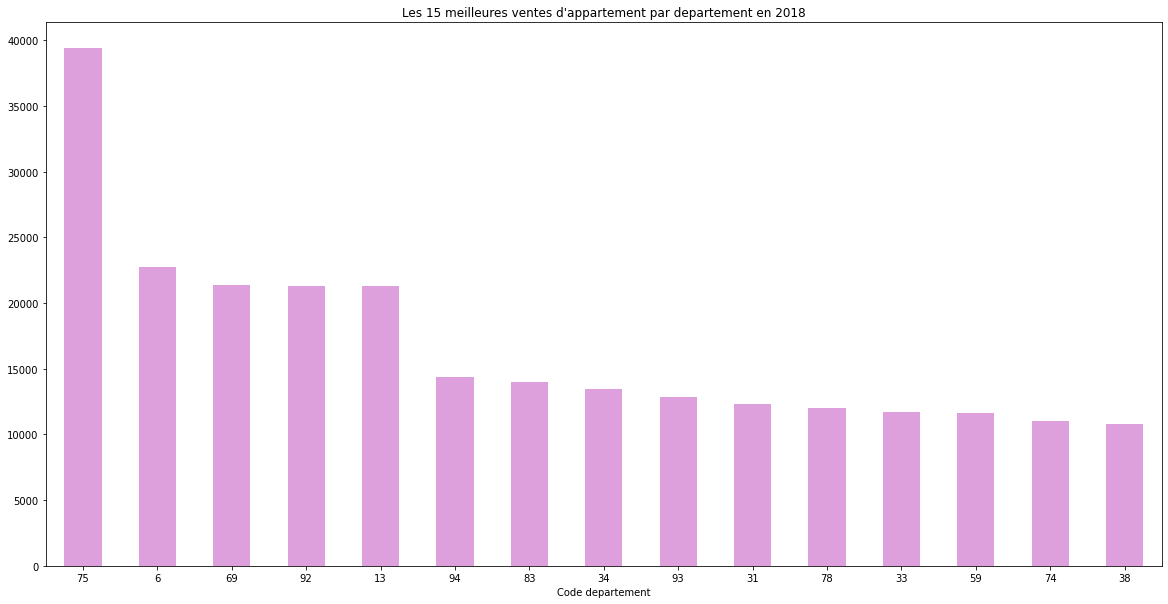

In [38]:
plt.figure(figsize=(20,10))
axis = vente_table2018[vente_table2018['Type local'] == 'Appartement'].groupby('Code departement')['Nature mutation'].count().sort_values(ascending = True).nlargest(15).plot.bar(rot=0, color='plum')
plt.title(label="Les 15 meilleures ventes d'appartement par departement en 2018")
plt.show()

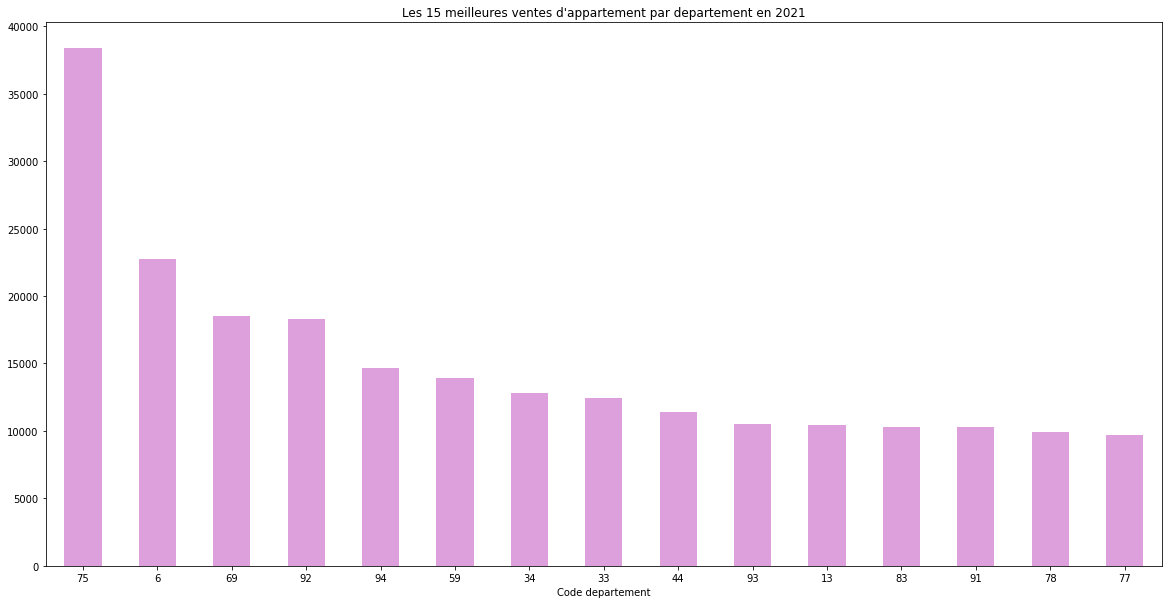

In [39]:
plt.figure(figsize=(20,10))
axis = vente_table2021[vente_table2021['Type local'] == 'Appartement'].groupby('Code departement')['Nature mutation'].count().sort_values(ascending = True).nlargest(15).plot.bar(rot=0, color='plum')
plt.title(label="Les 15 meilleures ventes d'appartement par departement en 2021")
plt.show()

Le département vendant le plus d'appartements est sans surprise Paris. On remarque assez logiquement que les départements contenant de grosses métropoles ou les départements d'Ile-de-France sont dans les 15 départements vendant le plus d'appartements.
Il semble y avoir peu de différences entre 2018 et 2021 dans les 4 départements avec le plus de ventes d'appartements que ce soit dans le nombre d'appartements vendus ou le top 4 des départements.

### On observe maintenant seulement les 15 meilleures ventes de dépendances par département

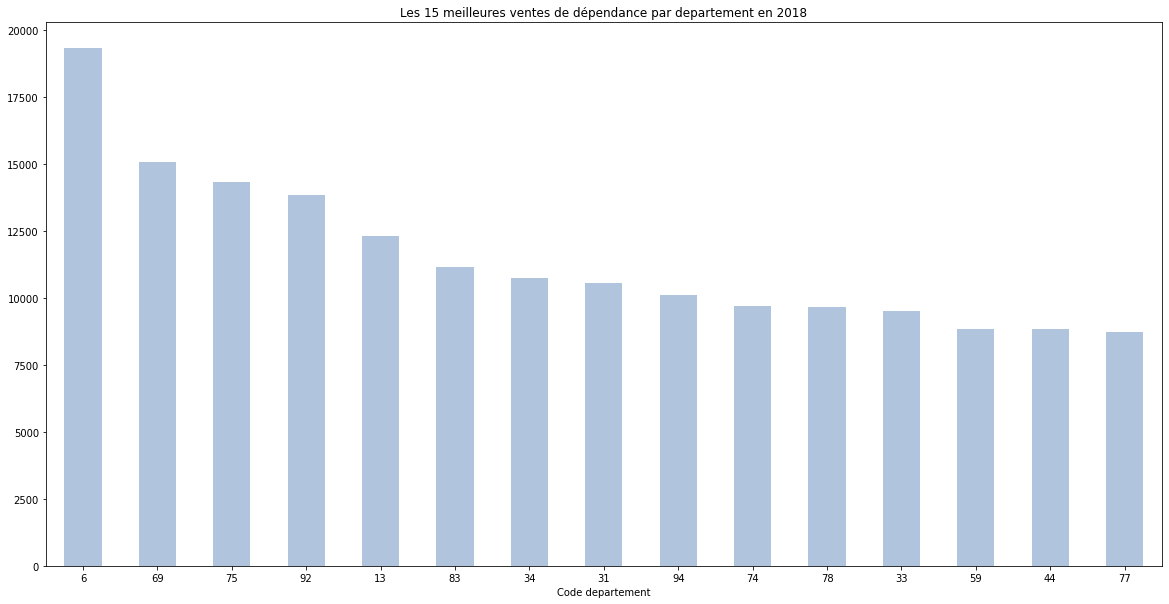

In [40]:
plt.figure(figsize=(20,10))
axis = vente_table2018[vente_table2018['Type local'] == 'Dépendance'].groupby('Code departement')['Nature mutation'].count().sort_values(ascending = True).nlargest(15).plot.bar(rot=0, color='lightsteelblue')
plt.title(label="Les 15 meilleures ventes de dépendance par departement en 2018")
plt.show()

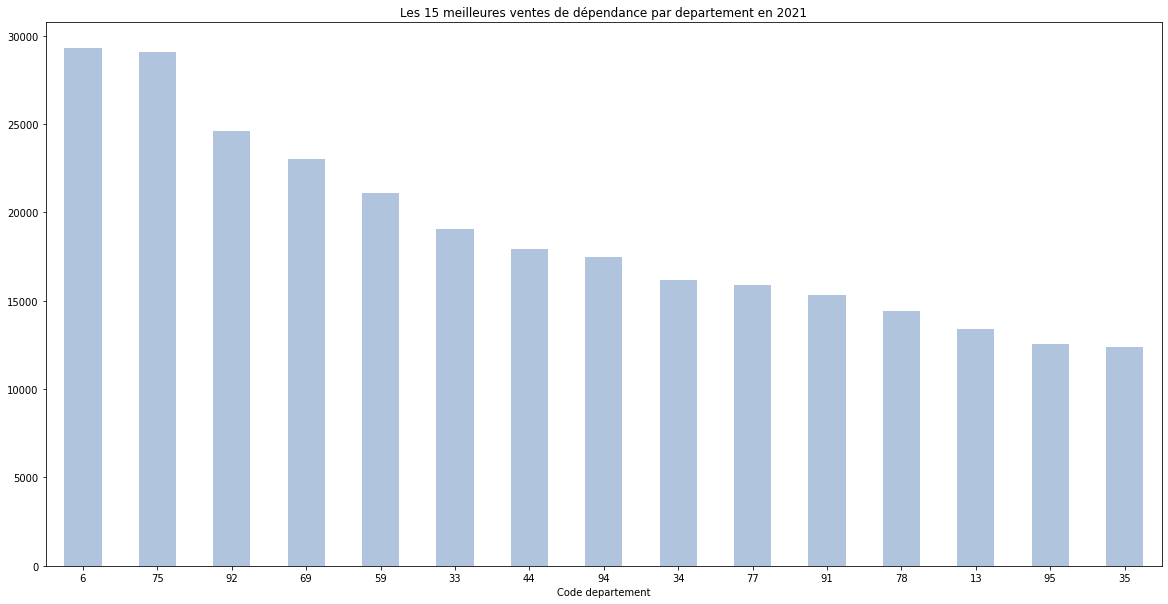

In [41]:
plt.figure(figsize=(20,10))
axis = vente_table2021[vente_table2021['Type local'] == 'Dépendance'].groupby('Code departement')['Nature mutation'].count().sort_values(ascending = True).nlargest(15).plot.bar(rot=0, color='lightsteelblue')
plt.title(label="Les 15 meilleures ventes de dépendance par departement en 2021")
plt.show()

La vente de dépendances à beaucoup augmenté entre 2018 et 2021. Elle a presque doublé dans le 75.

### Comparaison des prix au m² par ville

In [42]:
vente_table2018['prix m2'] = vente_table2018['Valeur fonciere']/vente_table2018['Surface reelle bati']
vente_table2021['prix m2'] = vente_table2021['Valeur fonciere']/vente_table2021['Surface reelle bati']

In [43]:
vente_table2018.drop(vente_table2018.loc[vente_table2018['prix m2']>500000].index,inplace=True)
vente_table2021.drop(vente_table2021.loc[vente_table2021['prix m2']>500000].index,inplace=True) 

On remarque qu'il y a énormement de données tronquées avec des prix du m² de plusieurs millions donc on décide de supprimer ces valeurs.

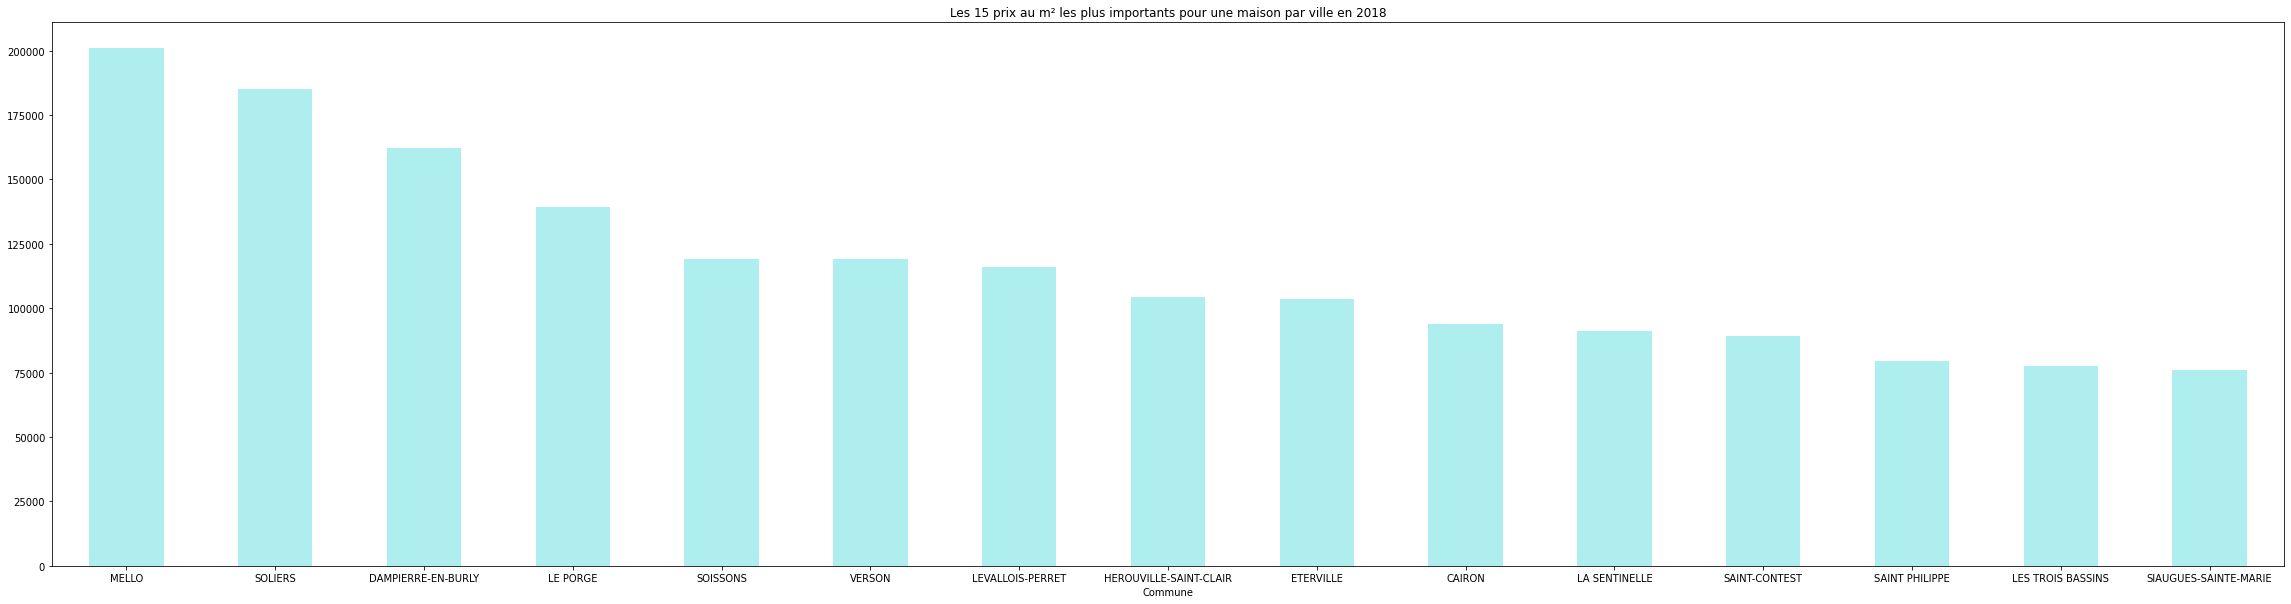

In [44]:
plt.figure(figsize=(40,10))
axis = vente_table2018[vente_table2018['Type local'] == 'Maison'].groupby('Commune')['prix m2'].mean().nlargest(15).sort_values(ascending = False).plot.bar(rot=0, color='paleturquoise')
plt.title(label='Les 15 prix au m² les plus importants pour une maison par ville en 2018')
plt.show()

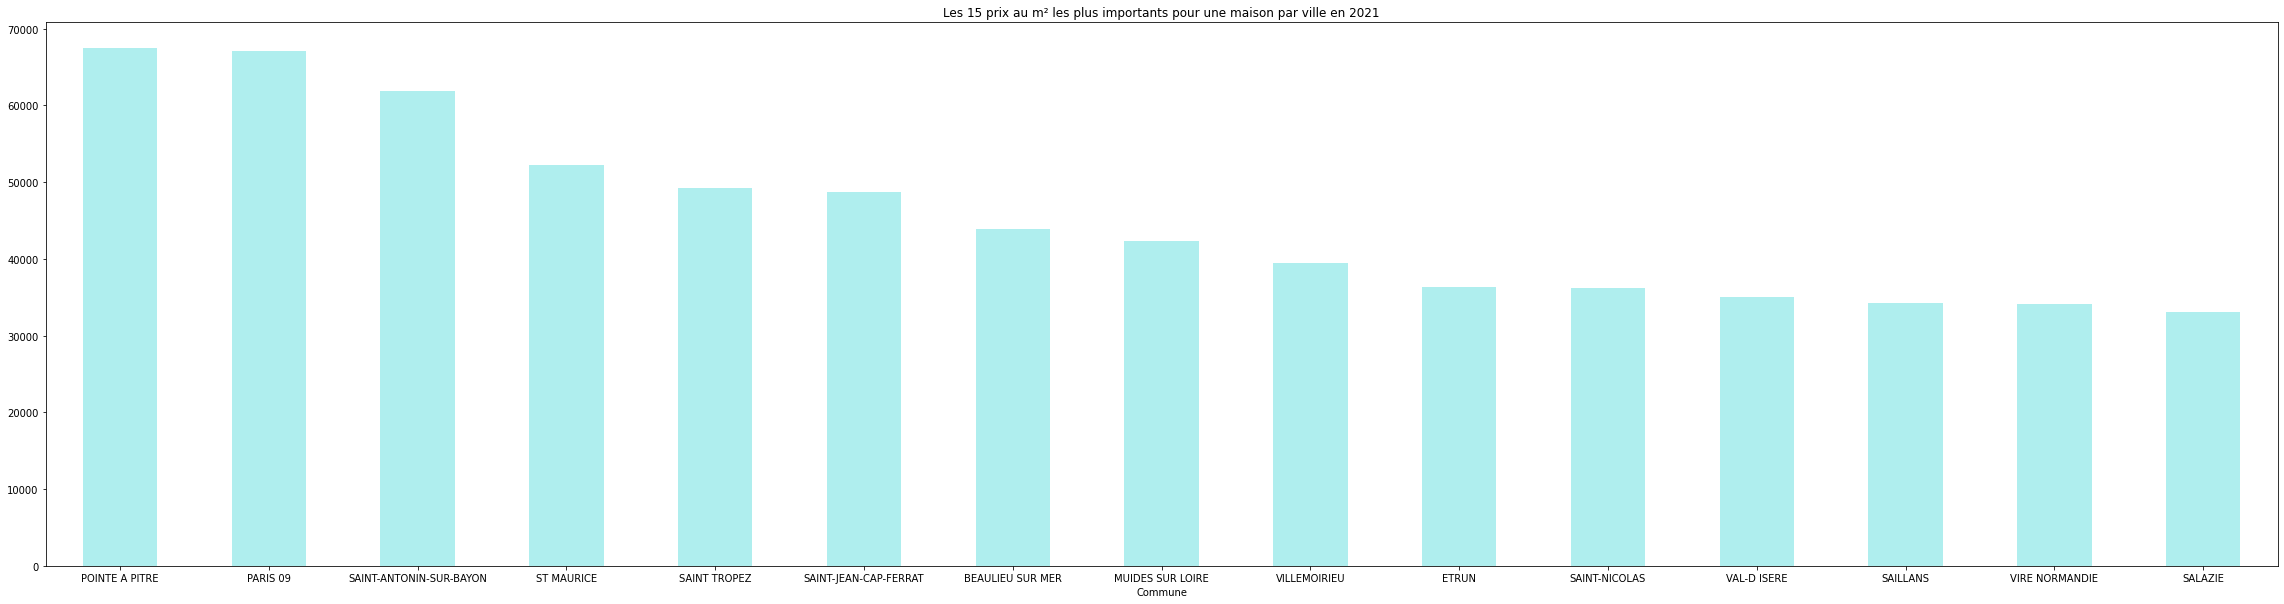

In [45]:
plt.figure(figsize=(40,10))
axis = vente_table2021[vente_table2021['Type local'] == 'Maison'].groupby('Commune')['prix m2'].mean().nlargest(15).sort_values(ascending = False).plot.bar(rot=0, color='paleturquoise')
plt.title(label='Les 15 prix au m² les plus importants pour une maison par ville en 2021')
plt.show()

Nous avons l'impression que le prix au m² par ville n'est pas forcément exploitable si l'on choisi une année en particulier car beaucoup de villes sont dans des zones peu prisées mais il suffit d'une vente pour que la moyenne explose.

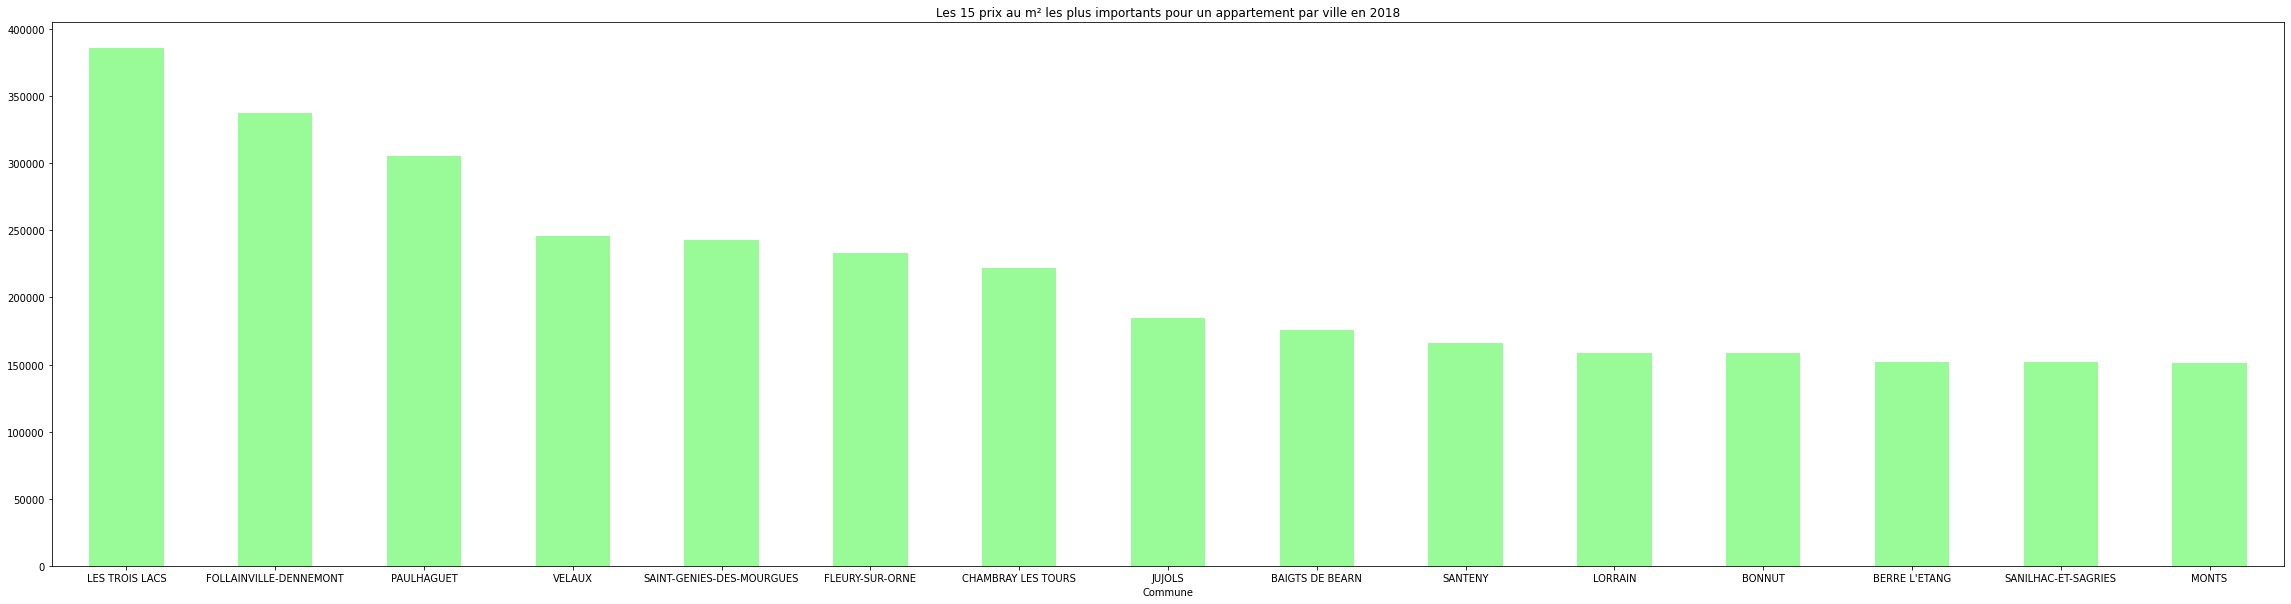

In [46]:
plt.figure(figsize=(40,10))
axis = vente_table2018[vente_table2018['Type local'] == 'Appartement'].groupby('Commune')['prix m2'].mean().nlargest(15).sort_values(ascending = False).plot.bar(rot=0, color='palegreen')
plt.title(label='Les 15 prix au m² les plus importants pour un appartement par ville en 2018')
plt.show()

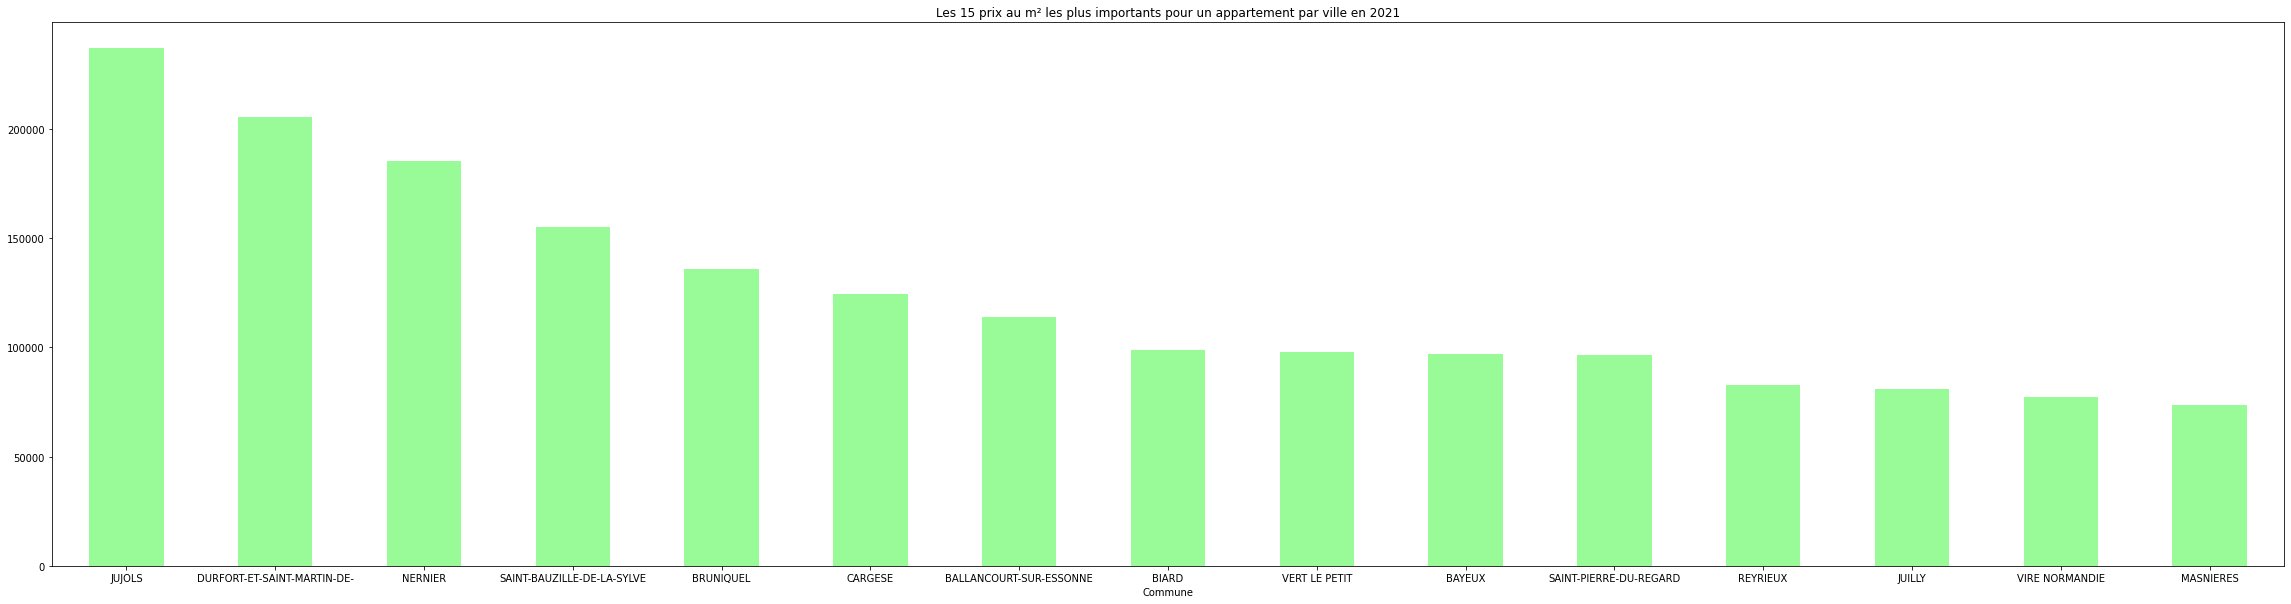

In [47]:
plt.figure(figsize=(40,10))
axis = vente_table2021[vente_table2021['Type local'] == 'Appartement'].groupby('Commune')['prix m2'].mean().nlargest(15).sort_values(ascending = False).plot.bar(rot=0, color='palegreen')
plt.title(label='Les 15 prix au m² les plus importants pour un appartement par ville en 2021')
plt.show()

Même conslusion que pour les maisons.

## Prix au m²

### Comparaison des prix au m² entre un appartement et une maison

In [48]:
plt.figure(figsize=(5,8))
x = [m2_maison2018,m2_appartement2018]
y = ['maison','appartement']
plt.bar(y,x,color=('navajowhite','lightsalmon'))

plt.title(label='Prix du m² en 2018')
plt.show()### Comparaison des prix au m² par ville

NameError: name 'm2_maison2018' is not defined

<Figure size 360x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,8))
x = [m2_maison2021,m2_appartement2021]
y = ['maison','appartement']
plt.bar(y,x,color=('navajowhite','lightsalmon'))

plt.title(label='Prix du m² en 2021')
plt.show()

On remarque qu'en général, le prix au m² d'un appartement est beaucoup plus élevé que le prix au m2 d'une maison. 
Le m² d'un appartement est presque 2 à 3 fois plus important que le prix au m² d'une maison. 
L'écart entre le prix au m² d'un appartement et d'une maison n'a pas vraiment varié mais les prix au m² ont baissé en 2021.

### Comparaison des prix au m² par ville

In [ ]:
plt.figure(figsize=(30,10))
axis = vente_table2018[vente_table2018['Type local'] == 'Maison'].groupby('Code departement')['prix m2'].mean().sort_values(ascending = True).nlargest(15).plot.bar(rot=0,color='thistle')
plt.title(label='Les 15 prix au m² les plus importants pour une maison par departement en 2018')
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
axis = vente_table2021[vente_table2021['Type local'] == 'Maison'].groupby('Code departement')['prix m2'].mean().sort_values(ascending = True).nlargest(15).plot.bar(rot=0,color='thistle')
plt.title(label='Les 15 prix au m² les plus importants pour une maison par departement en 2021')
plt.show()

Paris a les maisons les plus chères au m² de manière écrasante, suivi par des départements contenant de grandes métropoles et quelques territoires d'Outre-Mer. Et de manière générale, le prix au m² a augmenté dans toutes les villes.

### Comparaison des prix au m² par département

In [ ]:
plt.figure(figsize=(30,10))
axis = vente_table2018[vente_table2018['Type local'] == 'Appartement'].groupby('Code departement')['prix m2'].mean().sort_values(ascending = True).nlargest(15).plot.bar(rot=0,color='lightsteelblue')
plt.title(label='Les 15 prix au m² les plus importants pour un dé### Comparaison des prix au m² par villepartement en 2018')
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
axis = vente_table2021[vente_table2021['Type local'] == 'Appartement'].groupby('Code departement')['prix m2'].mean().sort_values(ascending = True).nlargest(15).plot.bar(rot=0,color='lightsteelblue')
plt.title(label='Les 15 prix au m² les plus importants pour un département en 2021')
plt.show()

En 2018, les départements 2 et 28 ont les appartements les plus chers au m2. Ce classement contient de grandes différences entre le premier département et le 15e.
En 2021, le prix au m2 des appartements est moins cher. Paris dont le prix du m² d'un appartement a peu varié est maintenant positioné au sommet du classement, suivis par les autres départements d'Ile de France et de départements d'Outre-Mer.

### Comparaison des prix au m² par région

In [ ]:
m2_maison2018 = vente_table2018['prix m2'][vente_table2018['Type local'] == 'Maison'].mean()
m2_appartement2018 = vente_table2018['prix m2'][vente_table2018['Type local'] == 'Appartement'].mean()
m2_maison2021 = vente_table2021['prix m2'][vente_table2021['Type local'] == 'Maison'].mean()
m2_appartement2021 = vente_table2021['prix m2'][vente_table2021['Type local'] == 'Appartement'].mean()

m2_maison2021### Comparaison des prix au m² par département

In [ ]:
vente_reg2018['prix du m2'] = vente_table2018.groupby('Code departement')['prix m2'].mean()
vente_reg2018['prix du m2']

In [ ]:
vente_reg2021['prix du m2'] = vente_table2021.groupby('Code departement')['prix m2'].mean()
vente_reg2021['prix du m2']

In [ ]:
count = 0
for i in vente_reg2018['prix du m2']:
    vente_reg2018['Region'][count] = find_region(vente_reg2018.index[vente_reg2018['prix du m2'] == i].tolist()[0],REGIONS)
    count+=1

vente_reg2018.groupby('Region')['prix du m2'].mean().sort_values(ascending= False)

In [ ]:
count = 0
for i in vente_reg2021['prix du m2']:
    vente_reg2021['Region'][count] = find_region(vente_reg2021.index[vente_reg2021['prix du m2'] == i].tolist()[0],REGIONS)
    count+=1

vente_reg2021.groupby('Region')['prix du m2'].mean().sort_values(ascending= False)

In [ ]:
plt.figure(figsize=(30,10))
plt.title(label = 'Prix du m² par region en 2018')
axis = vente_reg2018.groupby('Region')['prix du m2'].mean().sort_values(ascending= False).plot.bar(rot=0,color='lightgreen')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
plt.title(label = 'Prix du m² par region en 2021')
axis = vente_reg2021.groupby('Region')['prix du m2'].mean().sort_values(ascending= False).plot.bar(rot=0,color='lightgreen')
plt.xticks(rotation=45)
plt.show()

Pour une raison que l'on ignore, le nom de la région Ile-de-France ne s'affiche par sur les graphiques.
En 2018, la Guyane est loin devant avec une moyenne du prix au m² s'élevant à plus de 14000€. Ce prix a chuté en 2021 jusqu'à moins de 5000€ le m². A l'inverse, la Martinique a vu son prix au m² exploser, passant de la dernière place à la 2ème avec une augmentation de plus de 5000€ le m².

### Moyenne du prix des ventes de maison par département

In [ ]:
plt.figure(figsize=(30,10))
axis = vente_table2018[vente_table2018['Type local'] == 'Maison'].groupby('Code departement')['Valeur fonciere'].mean().sort_values(ascending=False).nlargest(15).plot.bar(rot= 0, color='pink')
plt.title(label='Moyenne du prix des ventes de maison par département en 2018')
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
axis = vente_table2021[vente_table2021['Type local'] == 'Maison'].groupby('Code departement')['Valeur fonciere'].mean().sort_values(ascending=False).nlargest(15).plot.bar(rot= 0, color='pink')
plt.title(label='Moyenne du prix des ventes de maison par département en 2021')
plt.show()

Le prix des maisons a légèrement augmenté entre 2018 et 2021. Le classement n'a pas beaucoup bougé entre ces 2 années. On retrouve globalement les mêmes départements en tête.

### Moyenne du prix des ventes d'appartements par département

In [ ]:
plt.figure(figsize=(30,10))
axis = vente_table2018[vente_table2018['Type local'] == 'Appartement'].groupby('Code departement')['Valeur fonciere'].mean().sort_values(ascending=False).nlargest(15).plot.bar(rot= 0, color='powderblue')
plt.title(label="Moyenne du prix des ventes de d'appartements par département en 2018")
plt.show()

In [ ]:
plt.figure(figsize=(30,10))
axis = vente_table2021[vente_table2021['Type local'] == 'Appartement'].groupby('Code departement')['Valeur fonciere'].mean().sort_values(ascending=False).nlargest(15).plot.bar(rot= 0, color='powderblue')
plt.title(label="Moyenne du prix des ventes de d'appartements par département en 2018")
plt.show()

Le prix des appartements a beaucoup baissé entre 2018 et 2021. Il a même été divisé par 2 dans certains départements.
On retrouve également la Guyane (973) où la moyenne des prix a bien chuté comme on l'a vu précedemment.

### Nombre de ventes par mois

In [ ]:
vente_table2018['Date mutation'] = pd.to_datetime(vente_table2018['Date mutation'])
vente_par_mois2018 = vente_table2018.groupby(vente_table2018['Date mutation'].dt.month)['Date mutation'].count()

plt.figure(figsize=(30,10))
axis = vente_par_mois2018.plot.bar(rot= 0, color='lightsalmon')
plt.title(label="Nombre de ventes par mois de l'année 2018" )
plt.show()

In [ ]:
vente_table2021['Date mutation'] = pd.to_datetime(vente_table2021['Date mutation'])
vente_par_mois2021 = vente_table2021.groupby(vente_table2021['Date mutation'].dt.month)['Date mutation'].count()

plt.figure(figsize=(30,10))
axis = vente_par_mois2021.plot.bar(rot= 0, color='lightsalmon')
plt.title(label="Nombre de ventes par mois de l'année 2021" )
plt.show()

Au cours de l'année 2018, le pic des ventes était en décembre.
En comparaison, les ventes en 2021 s'étendent sur tous les mois : janvier, juin et juillet étant les mois enregistrant le plus de ventes.

In [ ]:
plt.figure(figsize=(30,10))
ventes_par_date = vente_table2021[['No disposition','Date mutation']].groupby('Date mutation').count()
plt.plot(ventes_par_date.index,ventes_par_date.values)
plt.title(label="Nombre de ventes tout au long de l'année 2021" )
plt.show()

On a voulu observer plus précisément le nombre de ventes par date tout au long de l'année mais ce graphique est inexploitable.

## Carte des densité des ventes en France

In [ ]:
ventes_par_dep2018 = vente_table2018[vente_table2018['Type local'] == 'Maison'].groupby('Code departement')['prix m2'].mean().sort_values(ascending = True)
ventes_par_dep2018.values

In [ ]:
dico_ventes2018 = zip(ventes_par_dep2018.index, ventes_par_dep2018.values)
data2018 = dict(dico_ventes2018)

### Ventes par département en 2018

In [ ]:
fr_chart = pygal.maps.fr.Departments(human_readable=True)
fr_chart.title = 'Densité ventes en France par department'
fr_chart.add('en 2018', data2018)

### Ventes par département en 2021

In [ ]:
ventes_par_dep2021 = vente_table2021[vente_table2021['Type local'] == 'Maison'].groupby('Code departement')['prix m2'].mean().sort_values(ascending = True)
ventes_par_dep2021.values

In [ ]:
dico_ventes2021 = zip(ventes_par_dep2021.index, ventes_par_dep2021.values)
data2021 = dict(dico_ventes2021)

In [ ]:
fr_chart = pygal.maps.fr.Departments(human_readable=True)
fr_chart.title = 'Densité ventes en France par department'
fr_chart.add('en 2021', data2021)### Ventes par département en 2018

Les départements d'Alsace, Moselle, Mayotte ainsi que Saint-Pierre et Miquelon sont en blancs sur la carte car on ne dispose d'aucune donnée sur les ventes de biens dans ces territoires.
En 2018, les ventes étaient plus importantes de manière générale comparé à 2021 : plus de départements sont foncés. Paris reste le département où la densité de ventes est la plus forte du pays.

## Ventes à Paris

In [ ]:
nb_maisons_vendues_Paris2021 = vente_table2021[vente_table2021['Type local']=='Maison'].groupby('Code departement').count().iloc[70]['No disposition']

In [ ]:
nb_apparts_vendus_Paris2021 = vente_table2021[vente_table2021['Type local']=='Appartement'].groupby('Code departement').count().iloc[70]['No disposition']

In [ ]:
plt.figure(figsize=(5,8))
x = [nb_maisons_vendues_Paris2021,nb_apparts_vendus_Paris2021]
y = ['maison','appartement']
plt.bar(y,x,color=('navajowhite','lightsalmon'))

plt.title(label='Types de ventes à Paris en 2021')
plt.show()

En 2021 à Paris, il y a eu beaucoup plus de ventes d'appartement que de maisons

### Prix moyen des ventes

In [ ]:
prix_moyen_maisons_vendues_Paris2021 = vente_table2021[vente_table2021['Type local']=='Maison'].groupby('Code departement').mean().iloc[70]['Valeur fonciere']
prix_moyen_apparts_vendus_Paris2021 = vente_table2021[vente_table2021['Type local']=='Appartement'].groupby('Code departement').mean().iloc[70]['Valeur fonciere']

In [ ]:
plt.figure(figsize=(5,8))
x = [prix_moyen_maisons_vendues_Paris2021,prix_moyen_apparts_vendus_Paris2021]
y = ['maison','appartement']
plt.bar(y,x,color=('navajowhite','lightsalmon'))

plt.title(label='Prix moyen des ventes à Paris en 2021')
plt.show()

Le prix moyen des maisons est 3 fois plus important que celui des appartements sans surprise. On peut tout de même noter que ces prix moyens s'élèvent respectivement à près de 3,5 millions et 1 millions pour les maisons et appartements.

In [ ]:
clean_table2018.to_csv('clea')

In [51]:
vente_table2018.to_csv('vente_table2018.csv')